In [ ]:
#Importing Values
import pandas as pd
import numpy as np
import pyc3dserver as c3d

itf = c3d.c3dserver()

ret = c3d.open_c3d(itf, 'S1_DP_04_M.c3d')

dict_header = c3d.get_dict_header(itf)

dict_groups = c3d.get_dict_groups(itf)

dict_markers = c3d.get_dict_markers(itf)
#print(dict_markers)

print(dict_markers.keys())
print(dict_markers['DATA'].keys())

#print(dict_markers['DATA']['POS'])
a = dict_markers['DATA']['POS']
print(a.keys())
print(a['LFHD'][0])

xList = []
yList = []
zList = []

for key, val in a.items():
    if key == 'RTHI2':
        for datapoint in val:
            xList.append(datapoint[0])
            yList.append(datapoint[1])
            zList.append(datapoint[2])

print((xList[0]))

ret = c3d.close_c3d(itf)    

Number of columns : 186
   Foot Strike  Event  Foot Off
1         0.64  1.635      2.03
The file is 683 frames long
The trial is 3.415 seconds
__________________________________________________


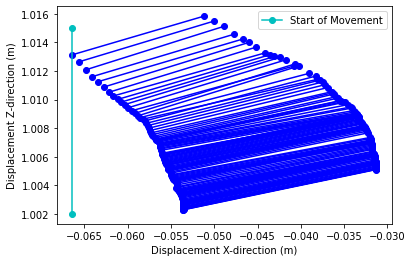

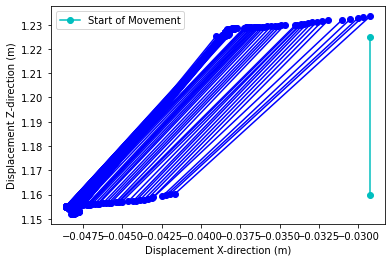

In [9]:

# Importing in needed modules to run functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Defining functions used to analyze data
def graphSegment(dataset, colX1, colZ1, colX2, colZ2, startRange, endRange):
    # * The function plots the segment between two markers to visualize the segment's movement over time. 
    # * Due to the amount of data points, the function is created so you can splice the dataset to visualize
    # * the moments that you want to. The function is designed so that it only plots the segments that don't cross over
    # * the x-distance for the first point, that way the segments are easier to track over time. This function can work
    # * for any of the planes, it all depends on the columns that is inputted. The function takes in 7 inputs and returns
    # * a figure. Starting with dataset, the columnsare based off the inputted data and the data is expected to be a 
    # * dataframe created using pandas. The type of data contained within the dataframe should be either int or float. 
    # * colX1, colZ1 are the two columns that contain the X and Z direction data for the first desired marker 
    # * (i.e 'RSK1' for X 'RSK1.2 for Z) and colX2, colZ2 are the two columns that contain the X and Z direction data for
    # * the second desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. startRange should be where you want to begin mapping the segment and
    # * endRange should be where you want to stop mapping the segment. Both startRange and endRange should be inputted
    # * as integers. The output is a figure containing the segments over time and the plot should be saved to a
    # * variable when calling the function. 


    # Creating the figure and axes that is going to be plotted on. Initializing necessary variables

    skipLine = 0
    fig, ax = plt.subplots()
    ax.set_xlabel('Displacement X-direction (m)')
    ax.set_ylabel('Displacement Z-direction (m)')

    # Manually cleaning up the imported columns by dropping the NaN values from the entire column
    dataset[colX1] = dataset[colX1].dropna()
    dataset[colZ1] = dataset[colZ1].dropna()
    dataset[colX2] = dataset[colX2].dropna()
    dataset[colZ2] = dataset[colZ2].dropna()
    #print(len(dataset[colX1]))
    
    # print(len(dataset[colX2]))
    
    # Looping through the desired portion of the segment's motion and plotting the line through each 
    # iteration of the loop. 
    for i in range(startRange,endRange):
        #Initializing the points in x-direction that are going to be checked and setting a pass condition
        if colX1 == 'Ball' or colZ1 == 'Ball.2':
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')

        else:
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')


            # ! Plotting the lines for each graph depending on the ranges imported into the function
            # ! Check the first condition, tyring to do Ball breaks it because the values start at 0
            if i == footStrike and startRange < footStrike and endRange <= followThrough :
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[0:footStrike][colZ1].dropna()), 3), round(max(dataset[0:footStrike][colZ2].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'co', linestyle = '-', label = 'Start of Movement')
                skipLine = 1

            if i == footStrike and skipLine != 1 and endRange > footStrike:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'go', linestyle = '-', label = 'Start of Movement')
            
        
            elif i == ballRelease:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ro', linestyle = '-', label = 'Ball Release')
            
        
            elif i == followThrough:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ko', linestyle = '-', label = 'Follow Through')
        
    ax.legend()

            
    # Returning the figure
    return fig


# Reading in the file and finding the amount of columns it has
columnCheck = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', skiprows= [0, 2, 3, 4], engine = 'python')

# Setting the max number of columns as a variable
maxCols = len(columnCheck.columns)

# Printing out the number of columns that is in the file
print('Number of columns :', maxCols)

# Reading in the data as a pandas dataframe for a csv file, columns used adjusts 
# for each file
data = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', usecols= np.r_[4:maxCols], skiprows= [0, 2, 3, 4], engine = 'python')

# Specifically reading in the events that were specified by the researchers
eventData = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', usecols= np.r_[0:3], skiprows= [0, 2, 3, 4], engine = 'python')

# Manually cleaning up the ball columns pandas series because it contains mostly NaN values.
# Making the NaN's zero to still be able to plot the values the same length as the
# other pandas series.

#data['Ball'] = data['Ball'].fillna(0)
#data['Ball.1'] = data['Ball.1'].fillna(0)
#data['Ball.2'] = data['Ball.2'].fillna(0)

#data = data.dropna()

# Isolating the event data and visualizing the times that the events occur
eventData = eventData.dropna()
print(eventData)

# Initializing and converting the event times to a frame to be used within the function
footStrike  = int((eventData.iloc[0]['Foot Strike']) * 200)
ballRelease = int((eventData.iloc[0]['Event']) * 200)
followThrough = int((eventData.iloc[0]['Foot Off']) * 200)

# Creating a pandas series to find the number of rows. This lets me find the total frame length
# and the total time of the trial
df = data.iloc[:]['RBHD'].dropna()
maxFrameLength = len(df)
trialLength = maxFrameLength / 200

# Visualizing/Communicating the total frame length and the trial times
print(f'The file is {maxFrameLength} frames long')
print(f'The trial is {trialLength} seconds')
print('_____' * 10)




#trunk = graphSegment(data, 'C7', 'C7.2', 'T8', 'T8.2', 0, followThrough+10)
forearm1 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, footStrike +1)
#forearm2 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', footStrike, ballRelease+1)
#forearm3 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', ballRelease, followThrough+1)
#totalForearm = forearm1 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, followThrough+1)
#baseball = graphSegment(data, 'Ball', 'Ball.2', 'Ball', 'Ball.2', 0, followThrough+1)
forearm1 = graphSegment(data, 'RUP1', 'RUP1.2', 'RUP3', 'RUP3.2', 0, footStrike +1)

#ax.plot(data.iloc[:]['FP1.1'])
#ax.plot(data.iloc[:]['FP1.2'])

#Number of columns : 189
#   Foot Strike  Event  Foot Off
#1        0.715   1.76     2.115
#The file is 761 frames long
#The trial is 3.805 seconds

c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_01_WM.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_02_WO.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_04_M.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_13_O.csv
dict_keys(['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_02_WO.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_04_M.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'])
__________________________________________________
128!
The file for S104 is 683 frames long
The trial is 3.415 seconds
 
Start of Movement: 0.64s
Ball Release: 1.635s
Follow Through: 2.025s
128!
__________________________________________________
[1.002, 1.015]
86!
The file for S1DP02 is 767 frames long
The trial is 3.835 seconds
 
Start of Movem

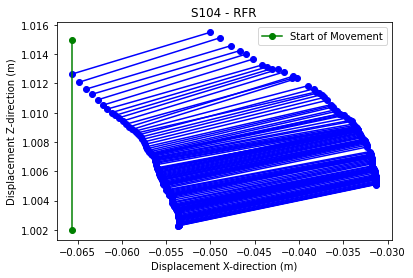

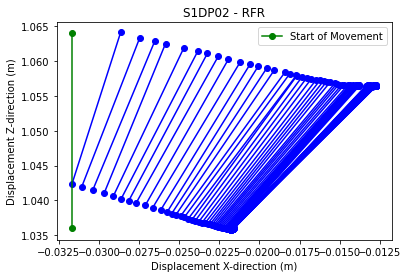

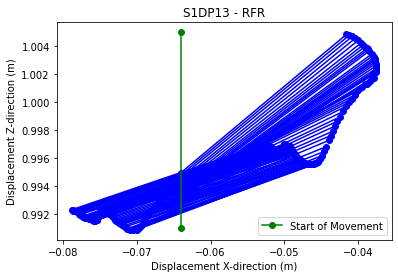

In [5]:
# Importing modules that are needed throughout the script
import pandas as pd
import numpy as np
import fontstyle
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Defining function that filters through the last names of the excel files and
# pulls the ones that have the letter you are searching for





# Retrieving the working directory that is going to be looped through
cwd = os.getcwd()

# Setting the directory to the current working directory so the file name can be concatenated
# to open each file individually
directory = os.getcwd()

# Creating a generator object that contains all of the excel files in the directory
# Asterisks is a wild card, so is saying take any file name that has .blahblah
# Could do sub wildcards i.e baseball.xlsx
files = Path(directory).glob('*.csv')

# Creating an empty list to append the results for each file, each part of list
# will be a data series
filesToCombine = {}
maxCols = {}

# Looping through the generator object and interact with each file
for file in files:
    # Print out file to make sure you are interacting with the correct file
    print(file)

    # Reads in the excel file as a dataframe
    #patientInfo = pd.read_excel(r'{filename}'.format(filename=file))
    columnCheck = pd.read_csv(r'{filename}'.format(filename=file), sep='\\t', skiprows= [0, 2, 3, 4], engine = 'python')
    # Takes the imported dataframe and isolates the last names into a data series
 
    filesToCombine[f'{file}'] = columnCheck
    maxCols[f'{file}'] = len(columnCheck.columns)
    # Using the function that filters the last name based on the letter you want

    # Convert the list of filtered names into a data series


    # Add the new data series to the list
print(filesToCombine.keys())
print('_____' * 10)
def graphSegment(dataset, colX1, colZ1, colX2, colZ2, startRange, endRange, titleName, firstLine = 0, secondLine = 0, thirdLine = 0):
    # * The function plots the segment between two markers to visualize the segment's movement over time. 
    # * Due to the amount of data points, the function is created so you can splice the dataset to visualize
    # * the moments that you want to. The function is designed so that it only plots the segments that don't cross over
    # * the x-distance for the first point, that way the segments are easier to track over time. This function can work
    # * for any of the planes, it all depends on the columns that is inputted. The function takes in 7 inputs and returns
    # * a figure. Starting with dataset, the columnsare based off the inputted data and the data is expected to be a 
    # * dataframe created using pandas. The type of data contained within the dataframe should be either int or float. 
    # * colX1, colZ1 are the two columns that contain the X and Z direction data for the first desired marker 
    # * (i.e 'RSK1' for X 'RSK1.2 for Z) and colX2, colZ2 are the two columns that contain the X and Z direction data for
    # * the second desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. startRange should be where you want to begin mapping the segment and
    # * endRange should be where you want to stop mapping the segment. Both startRange and endRange should be inputted
    # * as integers. The output is a figure containing the segments over time and the plot should be saved to a
    # * variable when calling the function. 


    # Creating the figure and axes that is going to be plotted on. Initializing necessary variables

    
    fig, ax = plt.subplots()
    ax.set_xlabel('Displacement X-direction (m)')
    ax.set_ylabel('Displacement Z-direction (m)')

    # Manually cleaning up the imported columns by dropping the NaN values from the entire column
    dataset[colX1] = dataset[colX1].dropna()
    dataset[colZ1] = dataset[colZ1].dropna()
    dataset[colX2] = dataset[colX2].dropna()
    dataset[colZ2] = dataset[colZ2].dropna()
    #print(len(dataset[colX1]))
    
    # print(len(dataset[colX2]))
    
    # Looping through the desired portion of the segment's motion and plotting the line through each 
    # iteration of the loop. 
    count = 0
    for i in range(startRange,endRange):
        #Initializing the points in x-direction that are going to be checked and setting a pass condition
        if colX1 == 'Ball' or colZ1 == 'Ball.2':
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')
            ax.set_title(f'{titleName} + {colX1}')

        else:
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')
            ax.set_title(f'{titleName} - {colX1[0:-1]}')

            # ! Plotting the lines for each graph depending on the ranges imported into the function
            # ! Check the first condition, tyring to do Ball breaks it because the values start at 0
            
            if i == firstLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ1].dropna()), 3), round(max(dataset[startRange:endRange][colZ2].dropna()), 3)]
                print(verticalLineZ)#print(footStrike)
                #print(i)
                #print(f'{i} == {footStrike}')
                ax.plot(verticalLineX, verticalLineZ, 'go', linestyle = '-', label = 'Start of Movement')
                
            elif i == secondLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ro', linestyle = '-', label = 'Ball Release')
            
        
            elif i == thirdLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ko', linestyle = '-', label = 'Follow Through')
        
    ax.legend()

            
    # Returning the figure
    return fig

def visualizeForces(data5, titleName):
# ! Potentially set it up as 2 columns and 1 row so I can stack multiple people on top

    x = list(np.arange(0, len(data5.iloc[:]['FP1'])))
    for counter in range(len(x)):
        x[counter] = x[counter]/1000

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    
    ax1.plot(x, data5.iloc[:]['FP1'], label = 'Sagittal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.1'], label = 'Frontal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.2'], label = 'Longitudinal Forces')

    ax2.plot(x, data5.iloc[:]['FP2'], label = 'Sagittal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.1'], label = 'Frontal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.2'], label = 'Longitudinal Forces')

    ax1.set_title(titleName + ' - Force Plate 1')
    ax1.set_ylim(-100, 1000)
    ax1.legend()

    ax2.set_title(titleName + ' - Force Plate 2')
    ax2.set_ylim(-100, 1000)
    ax2.legend()

    minForcePlate1 = min(data5.iloc[:]['FP1.2'])
    minForcePlate2 = min(data5.iloc[:]['FP2.2'])
    peakForcePlate1 = max(data5.iloc[:]['FP1.2'])
    peakForcePlate2 = max(data5.iloc[:]['FP2.2'])

    minMaxTiming1 = []
    minMaxTiming2 = []
    for counter in range(len(data5.iloc[:]['FP1.2'])):
        if data5.iloc[counter]['FP1.2'] == minForcePlate1 or data5.iloc[counter]['FP1.2'] == peakForcePlate1:
            minMaxTiming1.append(counter)

        if data5.iloc[counter]['FP2.2'] == minForcePlate2  and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
        elif data5.iloc[counter]['FP2.2'] == peakForcePlate2 and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
    

    timeToPeakFP1 = abs(minMaxTiming1[0] - minMaxTiming1[1])/1000
    timeToPeakFP2 = abs(minMaxTiming2[0] - minMaxTiming2[1])/1000
    forceProduction1 = (peakForcePlate1 - minForcePlate1)/timeToPeakFP1
    forceProduction2 = (peakForcePlate2 - minForcePlate2)/timeToPeakFP2


    return fig, peakForcePlate1, peakForcePlate2, forceProduction1, forceProduction2

def forceComparison(**kwargs):
    #The function brings in as many data sets as you want as keyword arguments
    figureList = []
    yPeak = 0
    for titleName, dataset in kwargs.items():
        #Do something
        # Perform the initial report

        # Initializing and converting the event times to a frame to be used within the function for startRange and endRange  
        footStrike  = int((dataset.iloc[0]['Foot Strike']) * 200)
        ballRelease = int((dataset.iloc[0]['Event']) * 200)
        followThrough = int((dataset.iloc[0]['Foot Off']) * 200)

        # Creating a pandas series to find the number of rows. This lets me find the total frame length
        # and the total time of the trial
        
        df = dataset.iloc[:]['RBHD'].dropna()
        maxFrameLength = len(df)
        trialLength = maxFrameLength / 200

        # Running the function that visualizes the forces and gives peak force
        currentFigure, peakForce1, peakForce2, forceRateFP1, forceRateFP2 = visualizeForces(dataset, f'{titleName}')

        figureList.append(currentFigure)

        # Visualizing/Communicating the total frame length and the trial times
        print(fontstyle.apply('Trial Information', 'BOLD/BLACK/WHITE_BG'))
        print(f'The file for {titleName} is {maxFrameLength} frames long')
        print(f'The trial is {trialLength} seconds')
        print(" ")
        print(fontstyle.apply('Time of Events', 'BOLD/BLACK/WHITE_BG'))
        print(f'Start of Movement: {footStrike/200}s')
        print(f'Ball Release: {ballRelease/200}s')
        print(f'Follow Through: {followThrough/200}s')
        print(" ")
        print(fontstyle.apply('Force Data', 'BOLD/BLACK/WHITE_BG'))
        print(f'Lead Leg Peak Force: {peakForce1: .3f} N')
        print(f'Rear Leg Peak Force: {peakForce2: .3f} N')
        print(f'Force Production Rate (Force Plate 1): {forceRateFP1: .3f} N/s')
        print(f'Force Production Rate (Force Plate 2): {forceRateFP2: .3f} N/s')
        print('_____' * 10)
        
    return figureList

def segmentComparison(**kwargs):
    #The function brings in as many data sets as you want as keyword arguments
    figureList = []

    for titleName, dataset in kwargs.items():
        #Do something
        # Perform the initial report

        # Initializing and converting the event times to a frame to be used within the function for startRange and endRange  
        footStrike  = int((dataset.iloc[0]['Foot Strike']) * 200)
        ballRelease = int((dataset.iloc[0]['Event']) * 200)
        followThrough = int((dataset.iloc[0]['Foot Off']) * 200)
        print(f'{footStrike}!')
        # Creating a pandas series to find the number of rows. This lets me find the total frame length
        # and the total time of the trial
        
        df = dataset.iloc[:]['RBHD'].dropna()
        maxFrameLength = len(df)
        trialLength = maxFrameLength / 200

        # Visualizing/Communicating the total frame length and the trial times

        
        print(f'The file for {titleName} is {maxFrameLength} frames long')
        print(f'The trial is {trialLength} seconds')
        print(" ")
        print(f'Start of Movement: {footStrike/200}s')
        print(f'Ball Release: {ballRelease/200}s')
        print(f'Follow Through: {followThrough/200}s')
        
        print(f'{footStrike}!')
        print('_____' * 10)

        currentFigure = graphSegment(dataset, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, footStrike, titleName, firstLine = footStrike, secondLine = ballRelease, thirdLine = followThrough)
        
        figureList.append(currentFigure)

    return figureList


# forceFigures = forceComparison(S104 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_04_M.csv'], 
# S1DP01 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'],
# S1DP13 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'])

segmentFigures = segmentComparison(S104 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_04_M.csv'],
S1DP02 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'], 
S1DP13 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'])

#plt.show(forceFigures[0])
# plt.show(forceFigures[2])

###Checks
#print(filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'].iloc[0]['Foot Strike'])
#print(maxCols['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'])

# print(x)

[82.72499504211075, 82.8636091486348, 82.72427173342743, 82.73323761403445, 82.69653722401694, 82.68627159113268, 82.67935683515958, 82.6706885705181, 82.68665186582624, 82.71313105151954, 82.72658859077858, 82.68714768359325, 82.67541494337517, 82.63061635093663, 82.63174243215994, 82.66213763957043, 82.69606488000463, 82.67518417087064, 82.79838338222271, 82.80302712087165, 82.81169229295534, 82.83300625420935, 82.81988387119398, 82.82065575513008, 82.64350556374453, 82.5808665129597, 82.57672440927745, 82.53725188209098, 82.5507084233341, 82.56149814177104, 82.53323107379666, 82.53460117331055, 82.49305484185267, 82.45949694188744, 82.43424366208457, 82.39756939834844, 82.3670920321657, 82.36034764636199, 82.34017145957225, 82.31847303515993, 82.26684137883699, 82.23753798257202, 82.22230925289882, 82.20039514723014, 82.34339842955885, 82.30845132577285, 82.27204714356289, 82.2588114722402, 82.21275767323674, 82.201938566673, 82.15116256862126, 82.14831196583864, 82.1467398953711, 8

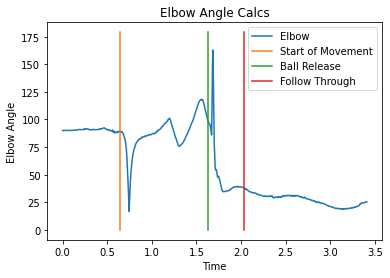

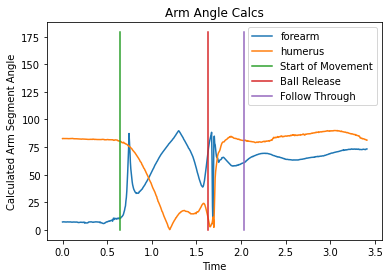

In [19]:
import math
# Working on a test plot


# Defining function

def sagittalSegmentAngle(dataset, colX1, colZ1, colX2, colZ2):
    # * The function finds the segment angle within the sagittal plane (x direction) of the motion
    # * capture data. Calculates the segment length of interest by using the distance formula involving
    # * two marker points across the entire collection and calculates an angle by putting the segment length
    # * in reference to the ground to create a 90 degree triangle to find the missing angle.
    # * The function takes in 5 inputs and 3 outputs. Starting with dataset, the calculations
    # * are based off the inputted data and the data is expected to be a dataframe created using pandas.
    # * The type of data contained within the dataframe should be either int or float. colX1, colZ1 are
    # * the two columns that contain the X and Z direction data for the first desired marker (i.e 'RSK1' for X
    # * 'RSK1.2) and colX2, colZ2 are the two columns that contain the X and Z direction data for the second
    # * desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. The outputs are lists containing float type objects
    # * for segment lengths, the calculated adjacent lengths and calculated angles using cosine.

    # Initializing variables
    segmentAngleList = []
    segmentLengthList = []
    adjacentLengthList = []

    #asdfadf
    datasetX1 = dataset[colX1].dropna()
    datasetZ1 = dataset[colZ1].dropna()
    datasetX2 = dataset[colX2].dropna()
    datasetZ2 = dataset[colZ2].dropna()

    #print(len(dataset.iloc[:][colX1]))

    # Running a for loop so that each value of x and z are synced up between the two desired
    # marker points in the cluster. Will creates lists for segment length, the calculated
    # adjacent length and the calculated angle. Uses .iloc from the pandas package to access
    # the dataframe and index properly. First [] is the row, second [] is the columns
    for value in range(len(datasetX1.iloc[:])):
        x2 = datasetX1.iloc[value]
        z2 = datasetZ1.iloc[value]

        x1 = datasetX2.iloc[value]
        z1 = datasetZ2.iloc[value]

        # Inputting variables into distance formula to find the length of the segment
        segmentLength = math.sqrt(((x2 - x1)**2) + ((z2 - z1)**2))
        segmentLengthList.append(segmentLength)

        # Inputting variables into distance formula to calculate the adjacent length
        # in order to find the angle
        adjacentLength = math.sqrt(((x2 - x1)**2) + ((z2 - z2)**2))
        #adjacentLength = math.sqrt(((x1 - x1)**2) + ((z2 - z1)**2))
        adjacentLengthList.append(adjacentLength)

        # Using cosine to calculate the angle for the entire segment
        calculatedAngle = math.degrees((math.acos(adjacentLength/segmentLength)))
        #print(calculatedAngle)

        segmentAngleList.append((calculatedAngle))


        # A check to make sure that the function iterated all the way through
        #if value > 765:
            #print("Distance has been calculated")

    return segmentAngleList, segmentLengthList, adjacentLengthList

forearmAngle, forearmLength, forearmAdjacentlength = sagittalSegmentAngle(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2')
humerusAngle, humerusLength, humerusforearmAdjacentLength = sagittalSegmentAngle(data, 'RUP1', 'RUP1.2', 'RUP3', 'RUP3.2')
# for angle in range(len(humerusAngle)):
#     humerusAngle[angle] = 180 - humerusAngle[angle]
# count = 0
# for calculatedAngle in forearmAngle:
#     if calculatedAngle < 10:
#         adjustedAngle = calculatedAngle + 90
#         forearmAngle[count] = adjustedAngle
#     count += 1
#print(forearmAngle[0:5])
#print(humerusAngle[200:250])

footStrikeLine = []
for i in range(0, 180):
    footStrikeLine.append(0.64)

eventLine = []
for i in range(0, 180):
    eventLine.append(1.635)

footOffLine = []
for i in range(0, 180):
    footOffLine.append(2.03)

x = list(range(0, len(forearmAngle)))
for number in x:
    x[number] = number/200
y = list(range(0, 180))

elbowAngle = []
for i in range(0, len(forearmAngle)):
    elbowAngle.append(abs(180 - forearmAngle[i] - humerusAngle[i]))

#print(forearmAngle)
print(humerusAngle)
#print(elbowAngle)
#print(elbowAngle)


fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Start of Movement')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle')
ax.set_xlabel('Time')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Start of Movement')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()


In [ ]:
#Calculating the elbow angle from our two segment angles
elbowAngle = []
for i in range(0, len(forearmAngle)):
    if forearmAngle[i] >= 0:
        elbowAngle.append(abs(forearmAngle[i] - (180 - humerusAngle[i])))
    else:
        elbowAngle.append(abs(abs(forearmAngle[i]) - (180 - humerusAngle[i])))

fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Foot Strike')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle')
ax.set_xlabel('Time')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Start of Movement')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()

fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Start of Movement')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle')
ax.set_xlabel('Time')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Start of Movement')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()


172.80313806208915
172.71257553015207
172.6744604695902
172.70754515835193
172.77554160164735
172.8620112846672
172.87403366138594
172.8873283319284
172.86008219589064
172.80071291412705
172.77303679862325
172.73936996090697
172.78239935270952
172.8055699851035
172.8401610920046
172.82205937010806
172.7510459067884
172.7376258035046
172.83725631823745
172.84128810883675
172.9099055791545
172.98920068029253
172.9394665495784
172.94976773585137
172.88673005401208
172.8321379811677
172.87307931435794
172.96592269523757
172.91793400250833
172.9226744836946
172.87244156417177
172.86832842650688
172.87086520806983
172.94625687150386
173.08501377851323
173.32679684129664
173.2898662182858
173.30174235562683
173.18115438855304
173.18046735856518
173.00231650116535
173.08392499040988
173.02330482259808
173.13027923776676
173.24593131041135
173.10255218159182
173.01924991021164
173.06368483475867
173.0470425318261
173.73720478737502
173.09552540569877
173.6209367494931
173.64083022254204
173.663

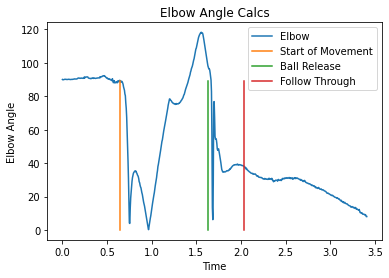

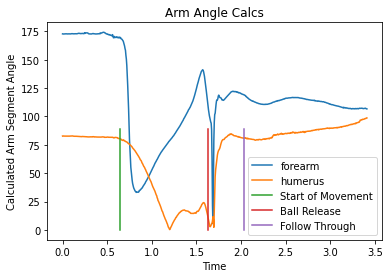

In [20]:
def sagittalSegmentAngle(dataset, colX1, colZ1, colX2, colZ2):
    # * The function finds the segment angle within the sagittal plane (x direction) of the motion
    # * capture data. Calculates the segment length of interest by using the distance formula involving
    # * two marker points across the entire collection and calculates an angle by putting the segment length
    # * in reference to the ground to create a 90 degree triangle to find the missing angle.
    # * The function takes in 5 inputs and 3 outputs. Starting with dataset, the calculations
    # * are based off the inputted data and the data is expected to be a dataframe created using pandas.
    # * The type of data contained within the dataframe should be either int or float. colX1, colZ1 are
    # * the two columns that contain the X and Z direction data for the first desired marker (i.e 'RSK1' for X
    # * 'RSK1.2) and colX2, colZ2 are the two columns that contain the X and Z direction data for the second
    # * desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. The outputs are lists containing float type objects
    # * for segment lengths, the calculated adjacent lengths and calculated angles using cosine.

    # Initializing variables
    segmentAngleList = []
    segmentLengthList = []
    adjacentLengthList = []

    #asdfadf
    datasetX1 = dataset[colX1].dropna()
    datasetZ1 = dataset[colZ1].dropna()
    datasetX2 = dataset[colX2].dropna()
    datasetZ2 = dataset[colZ2].dropna()

    # Running a for loop so that each value of x and z are synced up between the two desired
    # marker points in the cluster. Will creates lists for segment length, the calculated
    # adjacent length and the calculated angle. Uses .iloc from the pandas package to access
    # the dataframe and index properly. First [] is the row, second [] is the columns
    for value in range(len(datasetX1.iloc[:])):
        x2 = datasetX1.iloc[value]
        z2 = datasetZ1.iloc[value]

        x1 = datasetX2.iloc[value]
        z1 = datasetZ2.iloc[value]

        # Inputting variables into distance formula to find the length of the segment
        segmentLengthX = (x2 - x1)
        segmentLengthZ = (z2 - z1)
        
        #segmentLengthList.append(segmentLength)

        # Inputting variables into distance formula to calculate the adjacent length
        # in order to find the angle
        #adjacentLength = math.sqrt(((x2 - x1)**2) + ((z2 - z2)**2))
        #adjacentLengthList.append(adjacentLength)

        # Using cosine to calculate the angle for the entire segment
        calculatedAngle = abs(np.arctan2(segmentLengthZ, segmentLengthX))
        segmentAngleList.append((np.rad2deg(calculatedAngle)))
        print(np.rad2deg(calculatedAngle))
        # A check to make sure that the function iterated all the way through
        #if value > 766:
            #print("Distance has been calculated")

    return segmentAngleList, segmentLengthList, adjacentLengthList

forearmAngle, forearmLength, forearmAdjacentlength = sagittalSegmentAngle(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2')
humerusAngle, humerusLength, humerusforearmAdjacentLength = sagittalSegmentAngle(data, 'RUP1', 'RUP1.2', 'RUP3', 'RUP3.2')
#print(forearmAngle[0:5])
#print(humerusAngle[200:250])

footStrikeLine = []
for i in range(0, 90):
    footStrikeLine.append(0.64)

eventLine = []
for i in range(0, 90):
    eventLine.append(1.635)

footOffLine = []
for i in range(0, 90):
    footOffLine.append(2.03)

x = list(range(0, len(forearmAngle)))
for number in x:
    x[number] = number/200
y = list(range(0, 90))


#Calculating the elbow angle from our two segment angles
elbowAngle = []
for i in range(0, len(forearmAngle)):
    if forearmAngle[i] > 0 and humerusAngle[i] > 0:
        elbowAngle.append(abs(forearmAngle[i] - humerusAngle[i]))

    elif forearmAngle[i] >= 90 and humerusAngle[i] <= -90:
        newAngle = (forearmAngle[i] - humerusAngle[i])
        newAngle = 360 - newAngle
        #print(newAngle)
        elbowAngle.append(newAngle)

    elif forearmAngle[i] > 0 and humerusAngle[i] < 0:
        elbowAngle.append(forearmAngle[i] - humerusAngle[i])
        print(f'The frame is: {i} and the anlge is {elbowAngle[i]}, from {forearmAngle[i]} and {humerusAngle[i]}')

    elif forearmAngle[i] < 0 and forearmAngle[i] < 0:
        elbowAngle.append(abs(forearmAngle[i] + humerusAngle[i]))

    elif humerusAngle[i] > 90 and forearmAngle[i] < 0:
        newAngle2 = 360 + forearmAngle - humerusAngle
        print(f"Done with {i}")
        elbowAngle.append(newAngle2)

    elif humerusAngle[i] > 0 and forearmAngle[i] < 0:
        elbowAngle.append(360 - (humerusAngle[i] - forearmAngle[i]))
        print(f'The frame is: {i} and the anlge is {elbowAngle[i]}')
    

  
    #if i == 336:
        #print(f"Forearm: {forearmAngle[i]}")
        #print(f"Humerus: {humerusAngle[i]}")
        #print(f"ELbow: {elbowAngle[i]}")
        #print('___')

    #if i == 337:
        #print(f"Forearm: {forearmAngle[i]}")
        #print(f"Humerus: {humerusAngle[i]}")
        #print(f"ELbow: {elbowAngle[i]}")
        #print('___')

    #if i == 338:
        #print(f"Forearm: {forearmAngle[i]}")
        #print(f"Humerus: {humerusAngle[i]}")
        #print(f"ELbow: {elbowAngle[i]}")
        #print('___')


    #if i == 339:
        #print(f"Forearm: {forearmAngle[i]}")
        #print(f"Humerus: {humerusAngle[i]}")
        #print(f"ELbow: {elbowAngle[i]}")  

print(forearmAngle[1])
print(humerusAngle[1])
print(elbowAngle[1])


fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Start of Movement')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle')
ax.set_xlabel('Time')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Start of Movement')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()



Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has been calculated
Distance has b

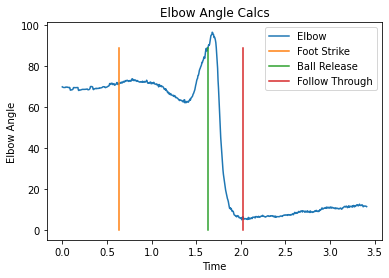

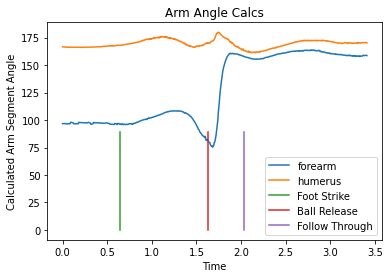

In [21]:
def sagittalSegmentAngle(dataset, colX1, colZ1, colX2, colZ2):
    # * The function finds the segment angle within the sagittal plane (x direction) of the motion
    # * capture data. Calculates the segment length of interest by using the distance formula involving
    # * two marker points across the entire collection and calculates an angle by putting the segment length
    # * in reference to the ground to create a 90 degree triangle to find the missing angle.
    # * The function takes in 5 inputs and 3 outputs. Starting with dataset, the calculations
    # * are based off the inputted data and the data is expected to be a dataframe created using pandas.
    # * The type of data contained within the dataframe should be either int or float. colX1, colZ1 are
    # * the two columns that contain the X and Z direction data for the first desired marker (i.e 'RSK1' for X
    # * 'RSK1.2) and colX2, colZ2 are the two columns that contain the X and Z direction data for the second
    # * desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. The outputs are lists containing float type objects
    # * for segment lengths, the calculated adjacent lengths and calculated angles using cosine.

    # Initializing variables
    segmentAngleList = []
    segmentLengthList = []
    adjacentLengthList = []

    # Running a for loop so that each value of x and z are synced up between the two desired
    # marker points in the cluster. Will creates lists for segment length, the calculated
    # adjacent length and the calculated angle. Uses .iloc from the pandas package to access
    # the dataframe and index properly. First [] is the row, second [] is the columns
    for value in range(len(dataset.iloc[:][colX1])):
        x1 = dataset.iloc[value][colX1]
        z1 = dataset.iloc[value][colZ1]

        x2 = dataset.iloc[value][colX2]
        z2 = dataset.iloc[value][colZ2]

        # Inputting variables into distance formula to find the length of the segment
        segmentLengthX = (x2 - x1)
        segmentLengthZ = (z2 - z1)
        #segmentLengthList.append(segmentLength)

        # Inputting variables into distance formula to calculate the adjacent length
        # in order to find the angle
        #adjacentLength = math.sqrt(((x2 - x1)**2) + ((z2 - z2)**2))
        #adjacentLengthList.append(adjacentLength)

        # Using cosine to calculate the angle for the entire segment
        calculatedAngle = np.arctan2(segmentLengthX, segmentLengthZ)
        segmentAngleList.append(abs(np.rad2deg(calculatedAngle)))

        # A check to make sure that the function iterated all the way through
        if value > 766:
            print("Distance has been calculated")

    return segmentAngleList, segmentLengthList, adjacentLengthList

forearmAngle, forearmLength, forearmAdjacentlength = sagittalSegmentAngle(data, 'LFR1', 'LFR1.2', 'LFR3', 'LFR3.2')
humerusAngle, humerusLength, humerusforearmAdjacentLength = sagittalSegmentAngle(data, 'LUP1', 'LUP1.2', 'LUP3', 'LUP3.2')
print(forearmAngle[0:5])
print(humerusAngle[200:250])

footStrikeLine = []
for i in range(0, 90):
    footStrikeLine.append(0.64)

eventLine = []
for i in range(0, 90):
    eventLine.append(1.635)

footOffLine = []
for i in range(0, 90):
    footOffLine.append(2.03)

x = list(range(0, len(forearmAngle)))
for number in x:
    x[number] = number/200
y = list(range(0, 90))


#Calculating the elbow angle from our two segment angles
elbowAngle = []
for i in range(0, len(forearmAngle)):
    elbowAngle.append(abs(forearmAngle[i] - humerusAngle[i]))

fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Foot Strike')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle')
ax.set_xlabel('Time')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Foot Strike')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()